In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_excel(r'Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['year_of_Journey']=data['Date_of_Journey'].dt.year
data['month_of_Journey']=data['Date_of_Journey'].dt.month
data['day_of_Journey']=data['Date_of_Journey'].dt.day

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
Airline             10682 non-null object
Date_of_Journey     10682 non-null datetime64[ns]
Source              10682 non-null object
Destination         10682 non-null object
Route               10682 non-null object
Dep_Time            10682 non-null object
Arrival_Time        10682 non-null object
Duration            10682 non-null object
Total_Stops         10682 non-null object
Additional_Info     10682 non-null object
Price               10682 non-null int64
year_of_Journey     10682 non-null int64
month_of_Journey    10682 non-null int64
day_of_Journey      10682 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 1.2+ MB


In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [12]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Hour']=data['Dep_Time'].dt.hour
data['Dep_Min']=data['Dep_Time'].dt.minute

In [13]:
data["Arrival_hour"] =pd.to_datetime(data['Arrival_Time'],errors='coerce').dt.hour
data['Arrival_hour'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17], dtype=int64)

In [14]:
data["Arrival_min"] =pd.to_datetime(data['Arrival_Time'],errors='coerce').dt.hour
data['Arrival_min'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17], dtype=int64)

In [15]:
data.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Route'],axis=1,inplace=True)

In [16]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,13
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,9,6,9,25,4,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,23
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,21


In [17]:
data['Additional_Info']=data['Additional_Info'].replace('No info','No Info')

In [18]:
data['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [19]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No Info,3897,2019,3,24,22,20,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No Info,7662,2019,1,5,5,50,13,13
2,Jet Airways,Delhi,Cochin,19h,2 stops,No Info,13882,2019,9,6,9,25,4,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No Info,6218,2019,12,5,18,5,23,23
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No Info,13302,2019,1,3,16,50,21,21


In [20]:
data['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [21]:
array=data['Duration'].to_list()
array[:5]


['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m']

In [22]:
duration_hour=[]
duration_min=[]
for item in array:
    if 'h' in item and 'm' in item:
        item=item.split('h')
        hour=int(item[0])
        minute=int(item[1].rstrip('m'))
        duration_hour.append(hour)
        duration_min.append(minute)
    elif 'h' not in item:
        minute=int(item[0].rstrip('m'))
        duration_hour.append(0)
        duration_min.append(minute)
    else:
        hour=int(item[0].rstrip('h'))
        duration_hour.append(hour)
        duration_min.append(0)



In [23]:
data['duration_hour']=duration_hour
data['duration_min']=duration_min

In [24]:
data.drop('Duration',axis=1,inplace=True)

In [25]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897,2019,3,24,22,20,1,1,2,50
1,Air India,Kolkata,Banglore,2 stops,No Info,7662,2019,1,5,5,50,13,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882,2019,9,6,9,25,4,4,1,0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218,2019,12,5,18,5,23,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302,2019,1,3,16,50,21,21,4,45


In [26]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cont_features=[feature for feature in num_features if len(data[feature].unique())>25]
disc_feature=[feature for feature in num_features if len(data[feature].unique())<25]

In [27]:
import seaborn as sns
print(cont_features)

['Price', 'duration_hour']


# finding outliers


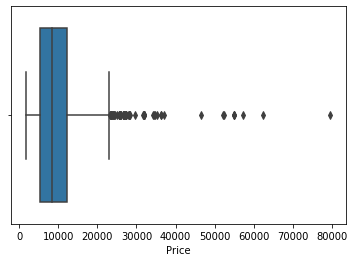

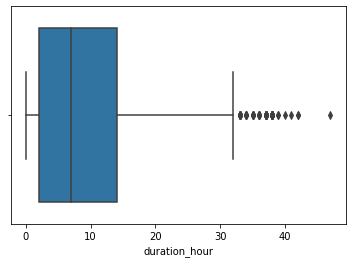

In [28]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()

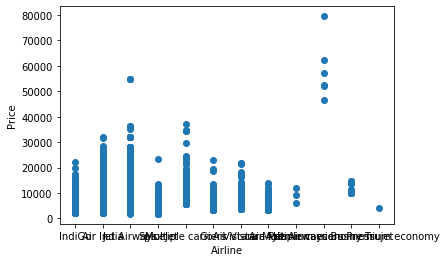

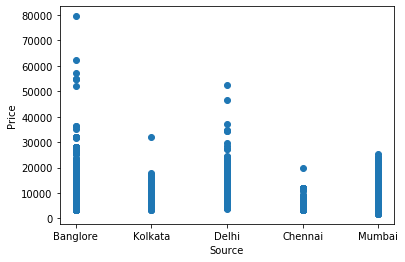

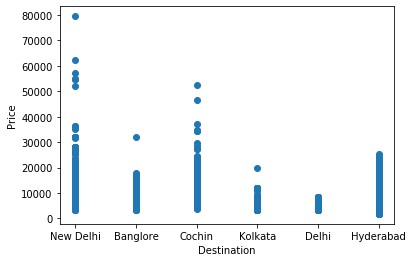

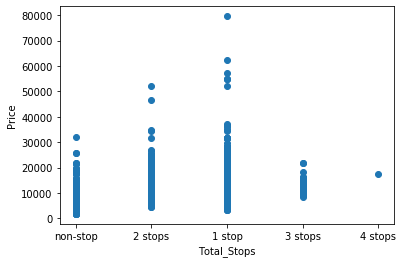

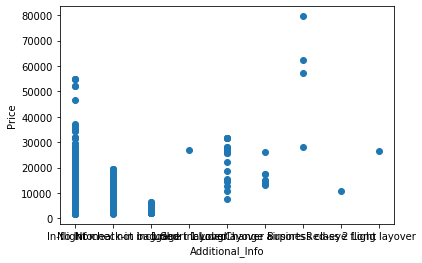

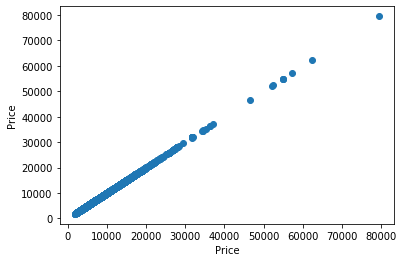

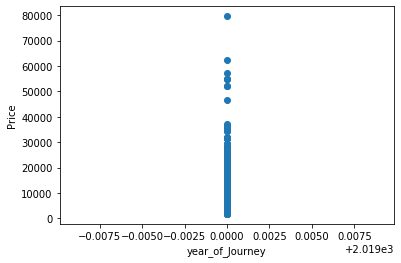

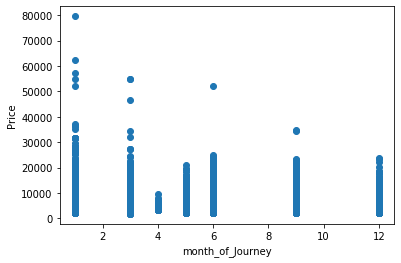

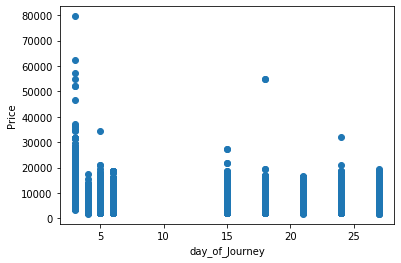

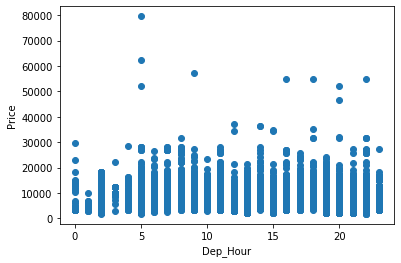

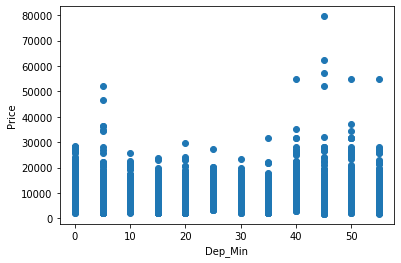

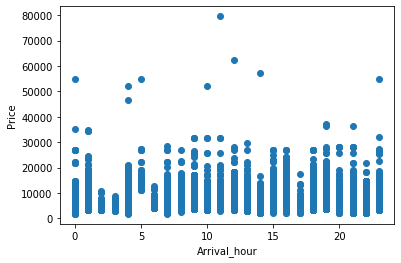

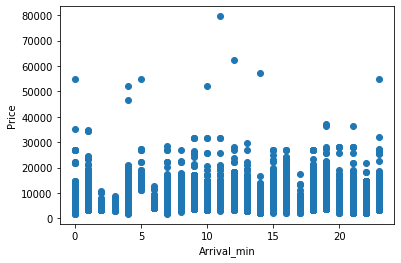

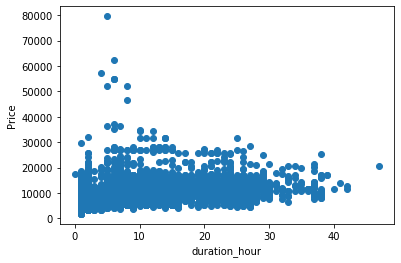

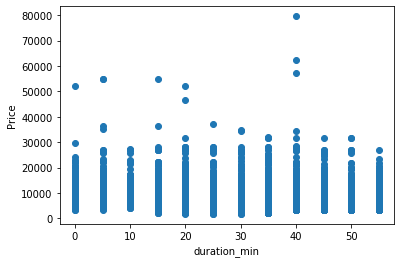

In [29]:
for feature in data.columns:
    plt.scatter(data[feature],data['Price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

using z score

In [30]:
from scipy import stats
z=np.abs(stats.zscore(data[cont_features]))

In [31]:
z

array([[1.12553455, 0.8897598 ],
       [0.30906781, 0.29284634],
       [1.03978296, 1.00914249],
       ...,
       [0.40296691, 0.77037711],
       [0.77218138, 0.8897598 ],
       [0.57809433, 0.17346365]])

In [32]:
array=np.where(z>3)
print(len(array[0]))
data.iloc[array[0],:].head() 

155


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min
123,Air India,Delhi,Cochin,1 stop,No Info,27430,2019,1,3,23,0,19,19,20,15
226,Jet Airways,Delhi,Cochin,2 stops,No Info,18799,2019,3,3,5,25,18,18,37,25
396,Multiple carriers,Delhi,Cochin,1 stop,No Info,36983,2019,1,3,12,50,19,19,6,25
486,Jet Airways,Banglore,New Delhi,1 stop,No Info,26890,2019,1,3,8,55,15,15,6,20
510,Jet Airways,Banglore,New Delhi,1 stop,No Info,26890,2019,1,3,7,0,12,12,5,25


In [33]:
array[0]

array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   919,   925,   936,   946,   959,   966,   969,
         975,   991,  1113,  1196,  1246,  1318,  1341,  1346,  1424,
        1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1785,
        1791,  1804,  1918,  2055,  2099,  2108,  2495,  2553,  2556,
        2618,  2635,  2641,  2654,  2693,  2924,  3032,  3111,  3257,
        3400,  3457,  3496,  3535,  3700,  3790,  3966,  4012,  4047,
        4521,  4676,  4785,  4829,  5013,  5136,  5372,  5439,  5516,
        5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,
        5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,  6407,
        6476,  6576,  6588,  6605,  6991,  7001,  7189,  7232,  7306,
        7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,  7612,
        7617,  7713,  7724,  7756,  7902,  7906,  8020,  8080,  8127,
        8360,  8409,  8412,  8451,  8470,  8536,  8598,  8621,  8698,
        8856,  8940,

# removing outliers

In [34]:
s=pd.Series(array[0])
mean=s.mean()
print(mean)
median=s.median()
std=s.std()
value=mean+2*median
print(value)
outliers=[123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   919,   925,   936,   946,   959,   966,   969,
         975,   991,  1113,  1196,  1246,  1318,  1341,  1346,  1424,
        1442,  1466,  1478,  1496,  1551,  1629,  1654,  1657,  1785,
        1791,  1804,  1918,  2055,  2099,  2108,  2495,  2553,  2556,
        2618,  2635,  2641,  2654,  2693,  2924,  3032,  3111,  3257,
        3400,  3457,  3496,  3535,  3700,  3790,  3966,  4012,  4047,
        4521,  4676,  4785,  4829,  5013,  5136,  5372,  5439,  5516,
        5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,
        5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,  6407,
        6476,  6576,  6588,  6605,  6991,  7001,  7189,  7232,  7306,
        7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,  7612,
        7617,  7713,  7724,  7756,  7902,  7906,  8020,  8080,  8127,
        8360,  8409,  8412,  8451,  8470,  8536,  8598,  8621,  8698,
        8856,  8940,  8957,  8990,  9019,  9192,  9238,  9246,  9395,
        9550,  9631,  9672,  9702,  9714,  9847,  9973, 10019, 10051,
       10112, 10159, 10181, 10188, 10325, 10352, 10363, 10382, 10438,
       10455, 10510,7,   515,  1824,  1828,  2127,  2405,  2591,  2633,  2691,
        3317,  4765,  5162,  5293,  5523,  5850,  5980,  6526,  6901,
        7120,  8912,  8987,  9043,  9054,  9265,  9302,  9371,  9555,
        9688,  9929, 10350]
data.iloc[outliers,5:6]=value
data.head()


5339.567741935484
16777.567741935483


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897.0,2019,3,24,22,20,1,1,2,50
1,Air India,Kolkata,Banglore,2 stops,No Info,7662.0,2019,1,5,5,50,13,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882.0,2019,9,6,9,25,4,4,1,0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218.0,2019,12,5,18,5,23,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302.0,2019,1,3,16,50,21,21,4,45


In [35]:
mean=data['duration_hour'].mean()
std=data['duration_hour'].std()
value=mean+2*std
print(value)
outliers=[226, 553,   919,   925,   966,   969,   991,  1113,  1318,
         1346,  1442,  1496,  1551,  1657,  1791,  1804,  2553,  2641,
         2654,  3457,  3496,  3790,  3966,  4047,  4785,  5516,  5701,
         5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,  7001,
         7189,  7232,  7306,  7329,  7553,  7611,  7612,  7906,  8127,
         8360,  8409,  8412,  8621,  8698,  9246,  9395,  9550,  9672,
         9702,  9847, 10019, 10325, 10455,470, 2571, 2980, 5061, 7626, 9189]
data.iloc[outliers,13:14]=value
data.iloc[outliers,13:14].head()

26.20663664203844


,duration_hour
226,26.206637
553,26.206637
919,26.206637
925,26.206637
966,26.206637


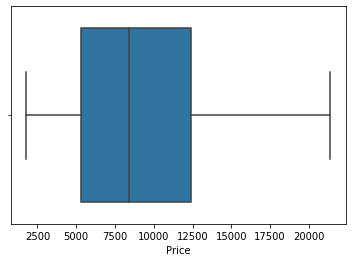

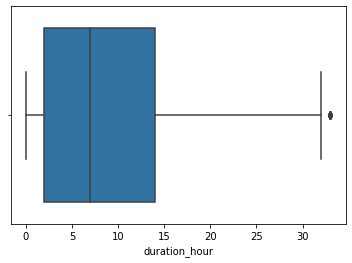

In [36]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()

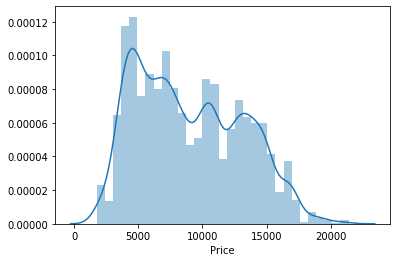

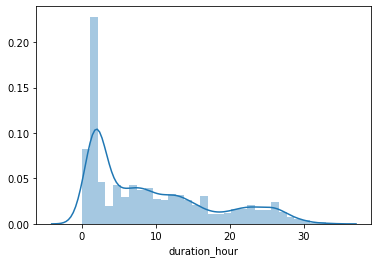

In [37]:
for feature in cont_features:
    sns.distplot(data[feature])
    plt.show()

In [38]:
#removed_outliers.value_counts()

In [39]:
#removed_outliers = data['duration_hour'].between(data['duration_hour'].quantile(.25), data['duration_hour'].quantile(.75))

In [40]:
for feature in cat_features:
    print(feature,'unique features {}'.format((len(data[feature].unique()))))

Airline unique features 12
Source unique features 5
Destination unique features 6
Total_Stops unique features 5
Additional_Info unique features 9


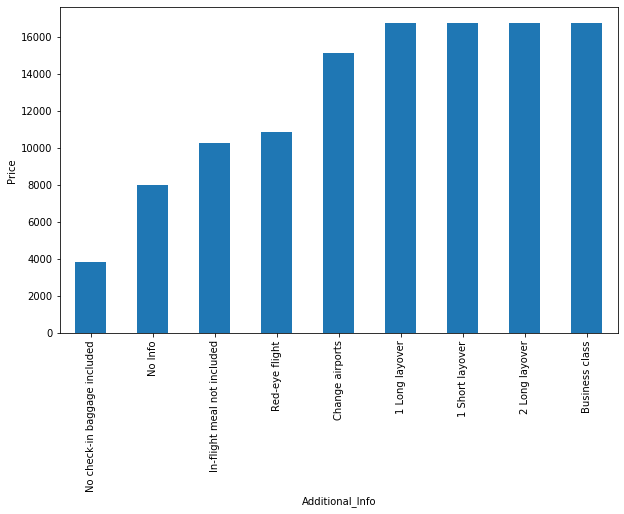

In [41]:
plt.figure(figsize=(10,6))
data.groupby('Additional_Info')['Price'].median().sort_values().plot.bar()
plt.ylabel('Price')
plt.show()

In [42]:
frequent=data['Additional_Info'].mode()

In [43]:
data['Additional_Info'].replace({'1 Long layover':'No Info','Change airports':'No Info','Business class':'No Info','2 Long layover':'No Info',
                                 'Red-eye flight':'No Info','1 Short layover':'No Info'},inplace=True)

In [44]:
array=data['Additional_Info'].value_counts().sort_values(ascending=False).to_dict()
array

{'No Info': 8380,
 'In-flight meal not included': 1982,
 'No check-in baggage included': 320}

In [45]:
data['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included'], dtype=object)

In [46]:
array={k:i for i,k in enumerate(array,0)}
array

{'No Info': 0,
 'In-flight meal not included': 1,
 'No check-in baggage included': 2}

In [47]:
data['Additional_Info_encoded']=data['Additional_Info'].map(array)


In [48]:
data['Additional_Info_encoded'].head()

0    0
1    0
2    0
3    0
4    0
Name: Additional_Info_encoded, dtype: int64

In [49]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

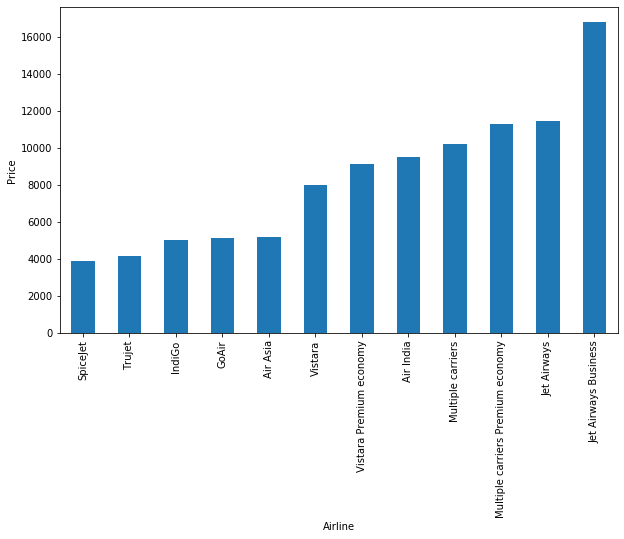

In [50]:
plt.figure(figsize=(10,6))
data.groupby('Airline')['Price'].median().sort_values().plot.bar()
plt.ylabel('Price')
plt.show()

In [51]:
import seaborn as sns

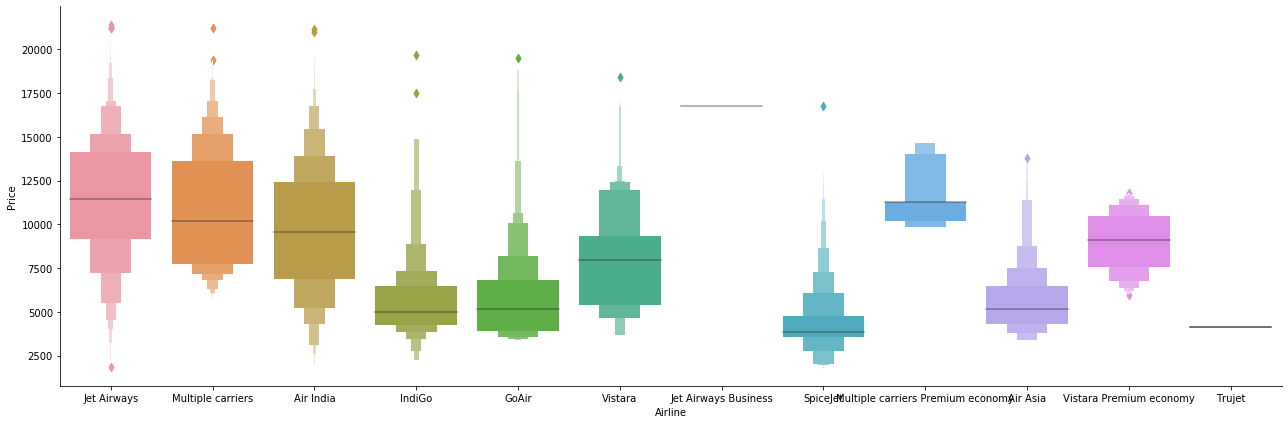

In [52]:
sns.catplot(y = "Price", x = "Airline", data =data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [53]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4330.351550
Air Asia                              5590.260188
IndiGo                                5671.064573
GoAir                                 5830.044164
Vistara                               7765.769735
Vistara Premium economy               8962.333333
Air India                             9624.475688
Multiple carriers                    10788.915870
Multiple carriers Premium economy    11418.846154
Jet Airways                          11433.394737
Jet Airways Business                 16777.567742
Name: Price, dtype: float64

In [54]:
array=data['Airline'].value_counts().sort_values(ascending=False).to_dict()
array

{'Jet Airways': 3849,
 'IndiGo': 2053,
 'Air India': 1751,
 'Multiple carriers': 1196,
 'SpiceJet': 818,
 'Vistara': 479,
 'Air Asia': 319,
 'GoAir': 194,
 'Multiple carriers Premium economy': 13,
 'Jet Airways Business': 6,
 'Vistara Premium economy': 3,
 'Trujet': 1}

In [55]:
array={k:i for i,k in enumerate(array,0)}

In [56]:
data['Airlines_encoded']=data['Airline'].map(array)


In [57]:
data['Airlines_encoded'].unique()

array([ 1,  2,  0,  4,  3,  7,  5,  6, 10,  9,  8, 11], dtype=int64)

In [58]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

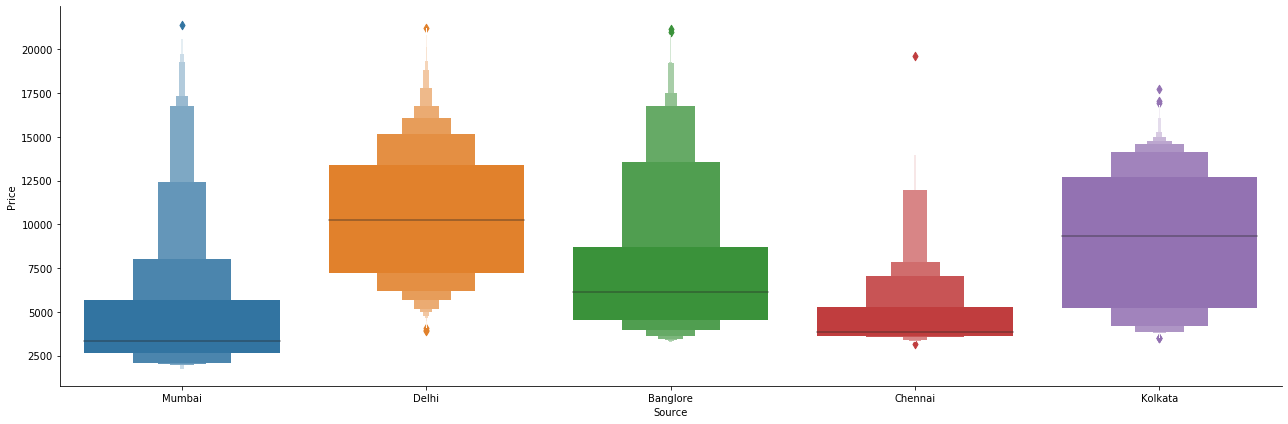

In [59]:
sns.catplot(y='Price',x='Source',data=data.sort_values(by='Price',ascending=False),kind="boxen", height = 6, aspect = 3)

In [60]:
data['Source'].value_counts(ascending=False)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [61]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897.0,2019,3,24,22,20,1,1,2.0,50,0,1
1,Air India,Kolkata,Banglore,2 stops,No Info,7662.0,2019,1,5,5,50,13,13,7.0,25,0,2
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882.0,2019,9,6,9,25,4,4,1.0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218.0,2019,12,5,18,5,23,23,5.0,25,0,1
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302.0,2019,1,3,16,50,21,21,4.0,45,0,1


In [62]:
source=data[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [63]:
destination=data[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [64]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

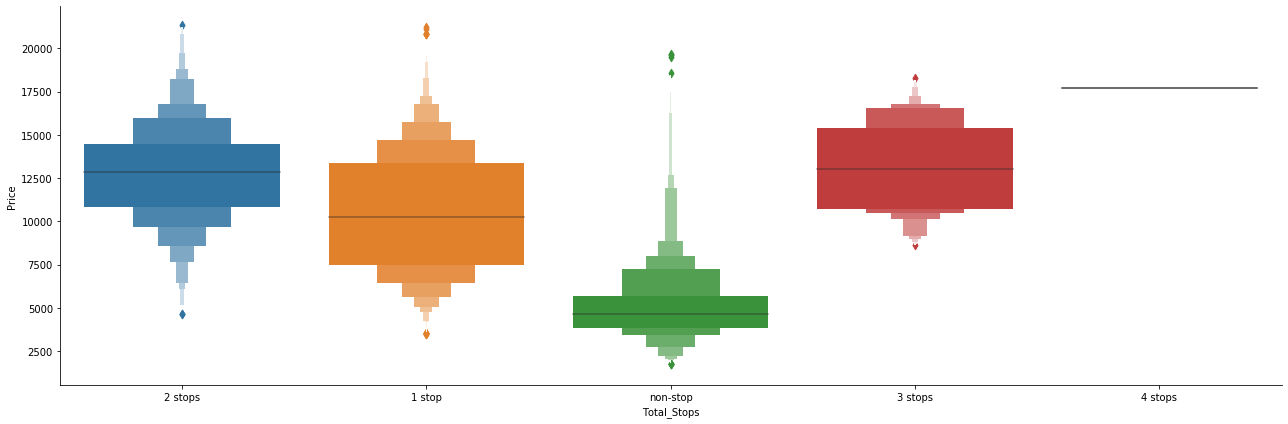

In [65]:
sns.catplot(y='Price',x='Total_Stops',data=data.sort_values('Price',ascending=False),kind="boxen", height = 6, aspect = 3)

In [66]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [67]:
frequent=data['Total_Stops'].mode()
data['Total_Stops'].replace({'3 stops':'1 stop','4 stops':'1 stop'},inplace=True)


In [68]:
array=data['Total_Stops'].value_counts().to_dict()
array

{'1 stop': 5671, 'non-stop': 3491, '2 stops': 1520}

In [69]:
array={'non-stop':0,'1 stop':1,'2 stops':2}
data['Total_Stops_encoder']=data['Total_Stops'].map(array)


In [70]:
data['Total_Stops_encoder'].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops_encoder, dtype: int64

In [71]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year_of_Journey,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897.0,2019,3,24,22,20,1,1,2.0,50,0,1,0
1,Air India,Kolkata,Banglore,2 stops,No Info,7662.0,2019,1,5,5,50,13,13,7.0,25,0,2,2
2,Jet Airways,Delhi,Cochin,2 stops,No Info,13882.0,2019,9,6,9,25,4,4,1.0,0,0,0,2
3,IndiGo,Kolkata,Banglore,1 stop,No Info,6218.0,2019,12,5,18,5,23,23,5.0,25,0,1,1
4,IndiGo,Banglore,New Delhi,1 stop,No Info,13302.0,2019,1,3,16,50,21,21,4.0,45,0,1,1


In [72]:
data.drop(['Total_Stops','Source','Destination','Airline','Additional_Info','year_of_Journey'],axis=1,inplace=True)

In [73]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1


In [74]:
data=pd.concat([data,source,destination],axis=1)

In [75]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


In [76]:
data=data.dropna()

In [77]:
#data['Price']=data['Price'].astype(int)
#data['Price']=np.log(data['Price'])

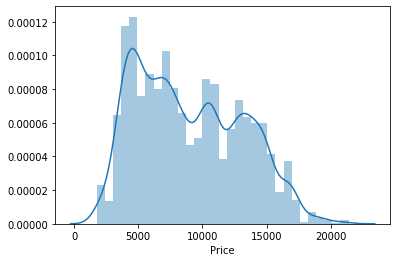

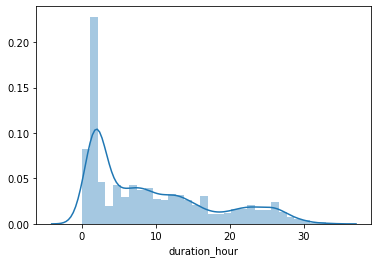

In [78]:
for feature in cont_features:
    sns.distplot(data[feature])
    plt.show()

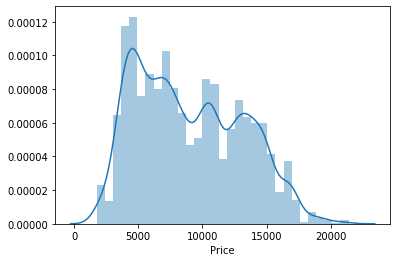

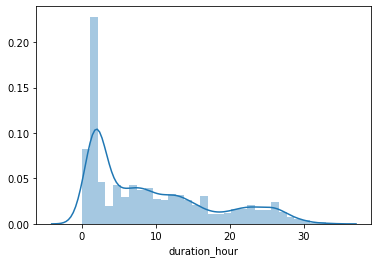

In [79]:
for feature in cont_features:
    sns.distplot(data[feature])
    plt.show()

In [80]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 21 columns):
Price                      10682 non-null float64
month_of_Journey           10682 non-null int64
day_of_Journey             10682 non-null int64
Dep_Hour                   10682 non-null int64
Dep_Min                    10682 non-null int64
Arrival_hour               10682 non-null int64
Arrival_min                10682 non-null int64
duration_hour              10682 non-null float64
duration_min               10682 non-null int64
Additional_Info_encoded    10682 non-null int64
Airlines_encoded           10682 non-null int64
Total_Stops_encoder        10682 non-null int64
Source_Chennai             10682 non-null uint8
Source_Delhi               10682 non-null uint8
Source_Kolkata             10682 non-null uint8
Source_Mumbai              10682 non-null uint8
Destination_Cochin         10682 non-null uint8
Destination_Delhi          10682 non-null uint8
Destination_Hyderabad  

In [82]:
data.describe()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,8974.192330,5.534731,12.682925,12.491013,24.409287,13.349186,13.349186,9.386110,28.326624,0.245460,1.711384,0.815484,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,4101.063205,2.987626,8.803800,5.748820,18.767801,6.859317,6.859317,8.195258,16.945817,0.495122,1.844208,0.659622,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,8.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,14.000000,7.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12384.000000,6.000000,21.000000,18.000000,40.000000,19.000000,19.000000,14.000000,45.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,21375.000000,12.000000,27.000000,23.000000,55.000000,23.000000,23.000000,33.000000,55.000000,2.000000,11.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


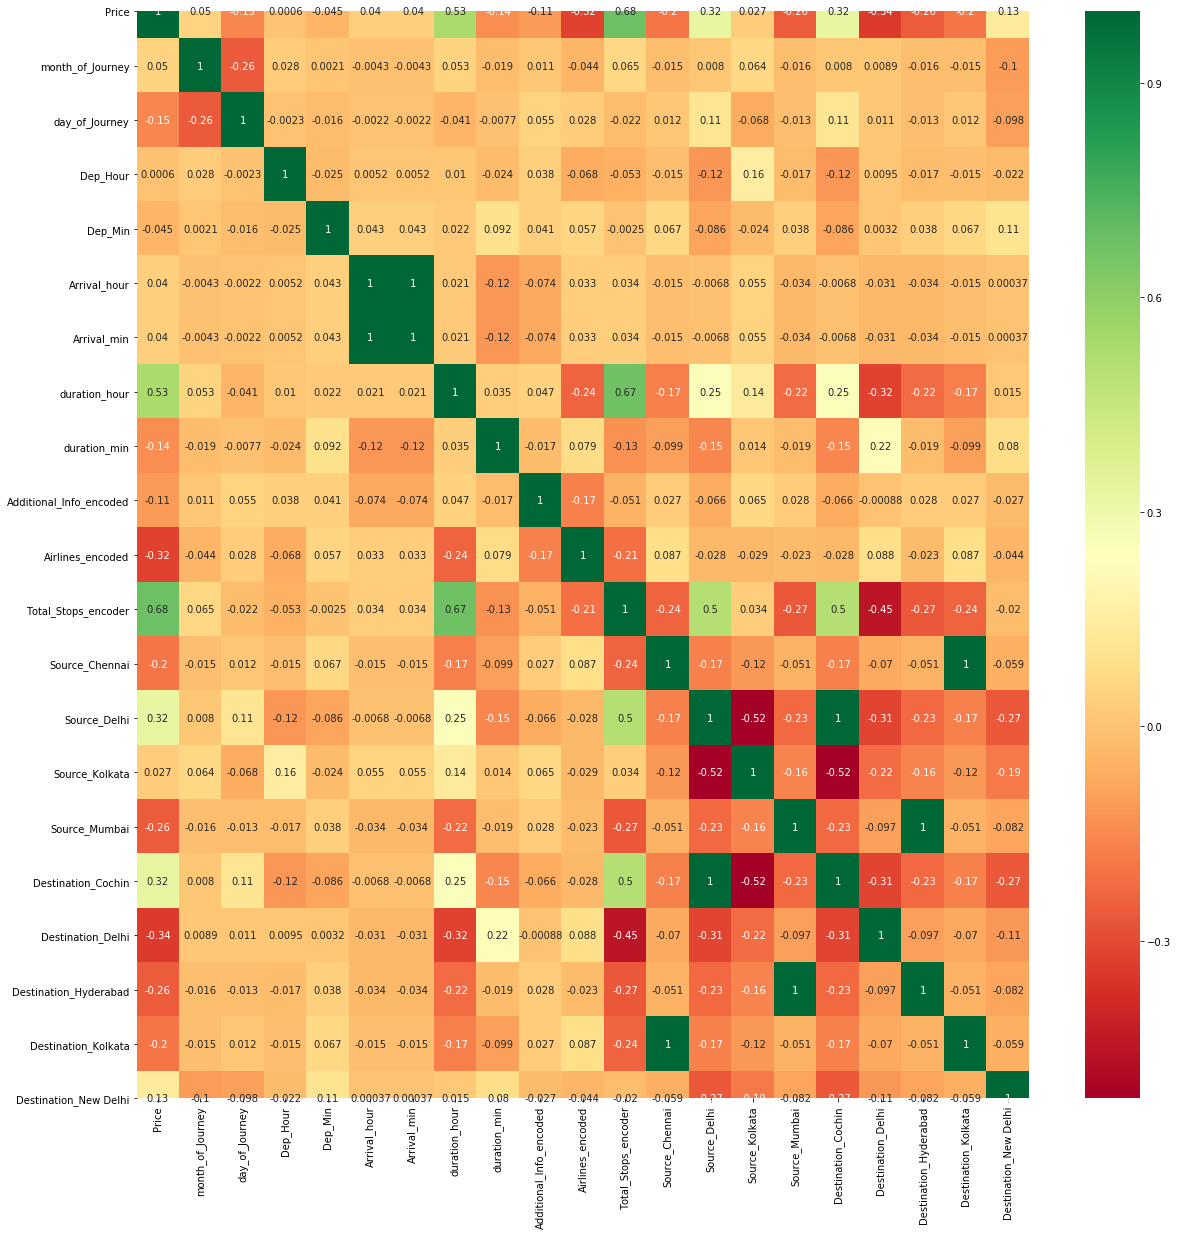

In [83]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()


In [84]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x.head()

,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


In [85]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc=StandardScaler()

In [88]:
# using scaled feature for regression type models
scaled_data=sc.fit(data)
scaled_data=scaled_data.transform(data)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns=data.columns
scaled_data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.238077,-0.848450,1.285536,1.654154,-0.234950,-1.800436,-1.800436,-0.901309,1.279041,-0.495779,-0.385757,-1.236347,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,-0.319979,-1.517909,-0.872724,-1.303113,1.363607,-0.050909,-0.050909,-0.291171,-0.196319,-0.495779,0.156506,1.795833,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,1.196772,1.159928,-0.759131,-0.607286,0.031476,-1.363054,-1.363054,-1.023336,-1.671678,-0.495779,-0.928021,1.795833,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,-0.672099,2.164117,-0.872724,0.958326,-1.034229,1.407030,1.407030,-0.535226,-0.196319,-0.495779,-0.385757,0.279743,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,1.055339,-1.517909,-1.099909,0.610412,1.363607,1.115442,1.115442,-0.657254,0.983969,-0.495779,-0.385757,0.279743,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


In [89]:
scaled_x=scaled_data.iloc[:,1:]
scaled_y=scaled_data.iloc[:,0]

# Test data

In [90]:
test_data=pd.read_excel(r'Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [91]:
test_data.shape

(2671, 10)

In [92]:
data.head()

,Price,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897.0,3,24,22,20,1,1,2.0,50,0,1,0,0,0,0,0,0,0,0,0,1
1,7662.0,1,5,5,50,13,13,7.0,25,0,2,2,0,0,1,0,0,0,0,0,0
2,13882.0,9,6,9,25,4,4,1.0,0,0,0,2,0,1,0,0,1,0,0,0,0
3,6218.0,12,5,18,5,23,23,5.0,25,0,1,1,0,0,1,0,0,0,0,0,0
4,13302.0,1,3,16,50,21,21,4.0,45,0,1,1,0,0,0,0,0,0,0,0,1


# model selection

In [93]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=0)

In [95]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred=lr.predict(x_test)

In [97]:
mse=print(np.mean((y_test-y_pred)**2))

0.44519722411652835


In [98]:
rscore=lr.score(x_test,y_test)
rscore

0.5716242775819453

In [99]:
rscore=lr.score(x_train,y_train)
rscore

0.5548420742687155

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [101]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.5192890513571324
MSE: 0.44519722411652796
RMSE: 0.6672310125560171


In [102]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)

In [103]:
rscore=ridge.score(x_test,y_test)
rscore

0.5716493769602571

In [104]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.5193516012300547
MSE: 0.4451711391332604
RMSE: 0.6672114650792959


In [105]:
lasso=Lasso(alpha=0.0005,normalize=True)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)

In [106]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.5381135940570093
MSE: 0.4754355577499103
RMSE: 0.6895183520037087


In [107]:
rscore=lasso.score(x_test,y_test)
rscore

0.5425284806783962

In [108]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [110]:
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

C:\programming\ML\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [111]:
array=model.feature_importances_

In [112]:
ser=pd.Series(array,index=x_train.columns).sort_values(ascending=False)
ser.head()

Total_Stops_encoder        0.377862
Airlines_encoded           0.132493
duration_hour              0.117187
day_of_Journey             0.090658
Additional_Info_encoded    0.065559
dtype: float64

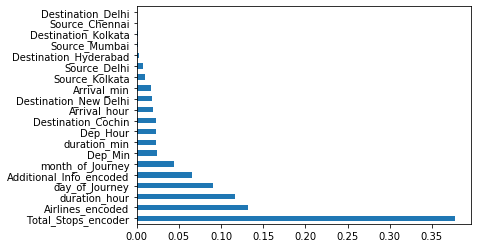

In [113]:
ser.plot(kind='barh')

In [114]:
n_estimators=[x for x in range(10,100,10)]
max_features=['auto','sqrt','log2']
max_depth=[x for x in range(5,30,5)]
min_sample_leaf=[2,4,6,8,10]
min_sample_split=[2,3,4,5]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_sample_leaf,
    'min_samples_split':min_sample_split
}

In [115]:
model=RandomForestRegressor()

In [116]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>

In [117]:
rd=RandomizedSearchCV(estimator=model,param_distributions=random_grid,cv=5,n_iter=10,verbose=2,random_state=0,scoring='neg_mean_squared_error')

In [118]:
rd.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.7s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.0s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2

[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=8, max_features=log2, max_depth=25 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=8, max_features=log2, max_depth=25, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=8

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [119]:
rd.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [120]:
model=RandomForestRegressor(n_estimators=70,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=20)

In [121]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [122]:
y_pred=model.predict(x_test)

In [123]:
model.score(x_test,y_test)

0.9232166662388691

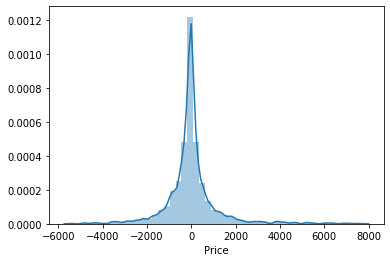

In [124]:
sns.distplot(y_test-y_pred)

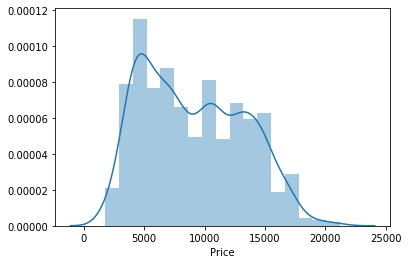

In [125]:
sns.distplot(y_test)

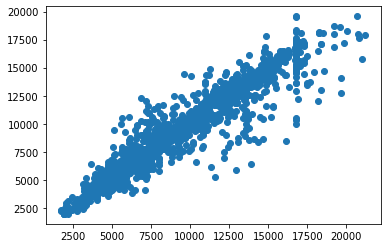

In [126]:
plt.scatter(y_test,y_pred)

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [128]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 651.6762817668936
MSE: 1341982.4272166335
RMSE: 1158.439651952847


In [129]:
import pickle

In [130]:
file=open('random_forest1.pkl','wb')
pickle.dump(model,file)

In [131]:
x_test.head()

,month_of_Journey,day_of_Journey,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,duration_hour,duration_min,Additional_Info_encoded,Airlines_encoded,Total_Stops_encoder,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10507,5,15,14,5,22,22,8.0,30,0,0,1,0,0,1,0,0,0,0,0,0
7705,5,21,7,15,12,12,5.0,15,0,1,1,0,1,0,0,1,0,0,0,0
7700,6,27,17,45,20,20,2.0,20,0,4,0,1,0,0,0,0,0,0,1,0
1437,6,3,9,45,14,14,4.0,40,0,0,1,0,0,0,0,0,0,0,0,1
8884,1,5,17,15,19,19,2.0,35,0,1,0,0,0,1,0,0,0,0,0,0
